# Môn: Lập trình cho Khoa học dữ liệu - 18_21
# Đồ án cuối kỳ

**Nhóm 17 - Thông tin thành viên:**
- Trần Hữu Chí Bảo - 18120288
- Trần Xuân Quý - 18120231

# 1. Thu thập dữ liệu



Tập dữ liệu được sử dụng trong đồ án của nhóm có chủ đề về các yếu tố liên quan và/hoặc có thể gây ảnh hưởng đếntuổi thọ trung bình của người dân ở các quốc gia trên thế giới. Tập dữ liệu này được thu thập và [đăng tải trên Kaggle](https://www.kaggle.com/mmattson/who-national-life-expectancy?fbclid=IwAR0eTr_kf9ivkOLZmJvJ5ULfjFIqAPGPKVsacqXq1TbR1yWxUTZEShQVTnQ) bởi người dùng MMattson với giấy phép `Creative Common Public Domain - CC0` cho phép sử dụng tập dữ liệu tùy ý mà không cần xin phép. 

Theo mô tả, tập dữ liệu trên được thu thập từ 2 nguồn là `GHO - Global Health Observatory` và `UNESCO`, với các số liệu trong khoảng thời gian từ năm 2000 - 2016. Về phần dữ liệu từ UNESCO tác giả đã truy cập vào trang web về dữ liệu Thống kê về Giáo dục các Quốc gia của Viện thống kê UNESCO và thu thập dữ liệu thủ công. Dữ liệu từ GHO được thu thập sử dụng thư viện request thông qua GHO OData API portal.

# 2. Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
# warnings.filterwarnings("ignore")

# 3. Khám phá dữ liệu

In [2]:
life_df = pd.read_csv('who_life_exp.csv')
life_df

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,Lao People's Democratic Republic,LAO,Western Pacific,2012,64.49448,16.57977,209.2666,0.055840,0.004845,6.29833,...,2.07638,6444.530,47.5,65.267,0.3,4570.0,22.7,1.82147,NaN,NaN
3107,Lao People's Democratic Republic,LAO,Western Pacific,2013,64.79716,16.64219,205.1459,0.055350,0.004600,6.42186,...,2.39985,6541.304,45.6,65.717,0.3,4980.0,NaN,3.23381,NaN,NaN
3108,Lao People's Democratic Republic,LAO,Western Pacific,2014,65.10757,16.70787,200.8204,0.054585,0.004405,6.64447,...,2.29846,6639.756,43.7,66.144,0.3,5440.0,NaN,2.93781,NaN,NaN
3109,Lao People's Democratic Republic,LAO,Western Pacific,2015,65.45008,16.77074,196.6613,0.053465,0.004160,6.83826,...,2.45366,6741.164,42.0,66.546,0.3,5810.0,NaN,NaN,84.66104,NaN


## Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

Dữ liệu có 3111 dòng và 32 cột

## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng mang thông tin về tuổi thọ trung bình của người dân một quốc gia trong một năm và các yếu tố khác liên quan như là chỉ số khối cơ thể, lượng cồn tiêu thụ trung bình, tỷ lệ người dân có nước sạch cơ bản, đạt miễn dịch một số loại bệnh, một số thông tin về nền kinh tế quốc gia, ...
Có vẻ không có dòng nào có ý nghĩa khác so với các dòng còn lại.

## Dữ liệu có các dòng bị lặp không?

In [5]:
have_duplicate = life_df.duplicated()
have_duplicate.sum()

0

Vậy là không có dòng nào trong tập dữ liệu bị trùng.

## Mỗi cột có ý nghĩa gì?

Theo mô tả trên trang web tập dữ liệu, mỗi cột có ý nghĩa:
- **country**: tên quốc gia.
- **country_code**: mã quốc gia 3 chữ cái.
- **region**: châu lục.
- **year**: năm của số liệu.
- **life_expect**, **une_life**: tuổi thọ trung bình của một người tính từ khi mới ra đời.
- **life_exp60**: thời gian trung bình theo năm một người từ 60 tuổi có thể sống.
- **adult_mortality**: tỷ lệ tử vong ở người trưởng thành (số người chết trong khoảng 15 - 60 tuổi/1000 người)
- **infant_mort**: tỷ lệ tử vong ở trẻ sơ sinh dưới 1 tuổi.
- **age1-4mort**: tỷ lệ tử vong ở trẻ sơ sinh từ 1 - 4 tuổi.
- **alcohol**: lượng cồn nguyên chất tiêu thụ ở người $\geq 15$ tuổi(lít).
- **bmi**: chỉ số khối cơ thể trung bình với người $\geq 18$ tuổi.
- **age5-19thinness**: tỷ lệ % số người 5 - 19 tuổi có cơ thể gầy, (BMI < median - 2s.d)
- **age5-19obesity**: tỷ lệ % số người 5 - 19 tuổi có cơ thể béo phì, (BMI > median + 2s.d)
- **hepatitis**: tỷ lệ tiêm phòng viêm gan B cho trẻ em trong khoảng 1 tuổi.
- **measles**: tỷ lệ tiêm phòng sởi liều đầu tiên cho trẻ em trong khoảng 1 tuổi.
- **polio**: tỷ lệ tiêm phòng bại liệt cho trẻ em trong khoảng 1 tuổi.
- **diphtheria**: 
- **basic_water**: tỷ lệ người dân được sử dụng nước sạch.
- **doctors**: số lượng bác sĩ/10000 dân.
- **hospitals**: số bệnh viện trên 100000 người dân.
- **gni_capita**, **une_gni**: thu nhập quốc dân 
- **gghe-d**: đầu tư công vào lĩnh vực y tế (%GDP)
- **che_gdp**: tổng dau9629 tư vào lĩnh vực y tế (%GDP)
- **une_pop**: dân số (1000 người)
- **une_infant**: số ca tử vong/1000 ca sinh.
- **une_hiv**: tỷ lệ người từ 15 - 49 tuổi nhiễm HIV.
- **une_poverty**: % dân số có thu nhập $\leq \$1.90$/ngày
- **une_edu_spend**: %GDP đầu tư công vào giáo dục.
- **une_literacy**: % dân số $\geq 15$ tuổi biết chữ.
- **une_school**: thời gian đi học trung bình (năm) của người dân $\geq 25$ tuổi.

Các cột có tên bắt đầu là `une` là cột có dữ liệu từ UNESCO, các cột khác được thu thập từ GHO.

## Mỗi cột hiện đang có kiểu dữ liệu gì?

In [3]:
life_df.dtypes

country             object
country_code        object
region              object
year                 int64
life_expect        float64
life_exp60         float64
adult_mortality    float64
infant_mort        float64
age1-4mort         float64
alcohol            float64
bmi                float64
age5-19thinness    float64
age5-19obesity     float64
hepatitis          float64
measles            float64
polio              float64
diphtheria         float64
basic_water        float64
doctors            float64
hospitals          float64
gni_capita         float64
gghe-d             float64
che_gdp            float64
une_pop            float64
une_infant         float64
une_life           float64
une_hiv            float64
une_gni            float64
une_poverty        float64
une_edu_spend      float64
une_literacy       float64
une_school         float64
dtype: object

Các cột đều có kiểu dữ liệu đúng với ý nghĩa, không có cột nào có kiểu dữ liệu không hợp lệ.

In [4]:
def missing_ratio(df):
    return df.isna().mean() * 100

### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

In [14]:
cate_df = life_df.select_dtypes('object')
cate_info = pd.concat([cate_df.agg([missing_ratio]), cate_df.describe()])
cate_info

,country,country_code,region
missing_ratio,0.0,0.0,0.0
count,3111,3111,3111
unique,183,183,6
top,Senegal,ATG,Europe
freq,17,17,850


### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

Như tìm hiểu ở trên, chĩ có 3 cột country, country_code và region là có kiểu dữ liệu object, cùng với cột year có kiểu dữ liệu số nhưng mang ý nghĩa định danh, các cột còn lại đều mang ý nghĩa về số liệu, tỷ lệ

In [16]:
pd.set_option("display.max_columns", None)
num_df = life_df.select_dtypes(exclude='object').drop(columns='year')
num_describe = pd.concat([num_df.agg([missing_ratio]), num_df.describe()])
num_describe

,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,hospitals,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
missing_ratio,0.000000,0.000000,0.000000,0.000000,0.000000,1.607200,1.092896,1.092896,1.092896,18.289939,0.610736,0.610736,0.610736,1.028608,42.783671,95.821279,21.922212,3.214401,3.760849,1.189328e+00,0.000000,0.000000,23.818708,3.760849,70.652523,41.337191,81.645773,74.124076
count,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3061.000000,3077.000000,3077.000000,3077.000000,2542.000000,3092.000000,3092.000000,3092.000000,3079.000000,1780.000000,130.000000,2429.000000,3011.000000,2994.000000,3.074000e+03,3111.000000,3111.000000,2370.000000,2994.000000,913.000000,1825.000000,571.000000,805.000000
mean,69.146384,18.912060,193.527786,0.032496,0.003489,4.834781,25.052714,5.312447,5.972278,85.436271,85.540427,86.608991,86.420116,83.332011,19.866038,2.044878,13397.146974,3.122935,6.110353,3.707550e+04,30.488428,68.957352,2.038397,14964.832999,10.845893,4.532930,81.984472,9.712214
std,9.129761,2.885412,114.007447,0.030361,0.005146,3.998741,2.193445,4.652408,4.530812,17.099786,15.282246,14.943226,15.332160,19.255119,14.071207,5.059339,16258.593973,2.091720,2.505267,1.378377e+05,27.756930,9.359194,4.593804,17495.137508,17.168798,1.754280,19.665588,2.854723
min,36.227360,10.728000,49.201850,0.001470,0.000065,0.000000,19.800000,0.100000,0.100000,2.000000,16.000000,8.000000,19.000000,18.695210,0.128000,0.000000,250.000000,0.062360,1.025160,7.601600e+01,1.600000,39.441000,0.100000,420.000000,0.100000,0.787440,14.376040,0.559340
25%,63.200095,16.619485,108.269750,0.008255,0.000355,1.198030,23.300000,1.800000,2.000000,81.000000,79.000000,81.000000,82.000000,71.658310,6.391250,0.535162,2540.000000,1.533445,4.238798,2.195105e+03,8.000000,62.844500,0.100000,2970.000000,0.600000,3.262830,72.701130,7.735940
50%,71.597200,18.508260,164.822200,0.019995,0.000895,3.993560,25.500000,3.800000,5.200000,92.000000,92.000000,93.000000,93.000000,91.994080,20.523500,1.072725,7460.000000,2.601300,5.758030,8.544297e+03,19.500000,71.409000,0.400000,8340.000000,3.100000,4.425410,90.953740,10.270400
75%,75.537030,21.099175,250.832300,0.051720,0.004877,7.723420,26.500000,7.800000,8.900000,97.000000,96.000000,97.000000,97.000000,98.552870,30.981750,2.104830,18250.000000,4.278110,7.850327,2.509552e+04,48.050000,75.570645,1.500000,20482.500000,12.400000,5.494980,95.786975,12.070610
max,84.166160,26.394020,696.874200,0.164515,0.039095,20.182460,32.200000,28.100000,26.700000,99.000000,99.000000,99.000000,99.000000,100.000010,79.541000,56.446950,123860.000000,12.062730,20.413410,1.414049e+06,142.400000,83.984880,28.200000,122670.000000,94.100000,14.059080,99.998190,14.378800


# Tìm các insight

## Mối tương quan giữa các thuộc tính

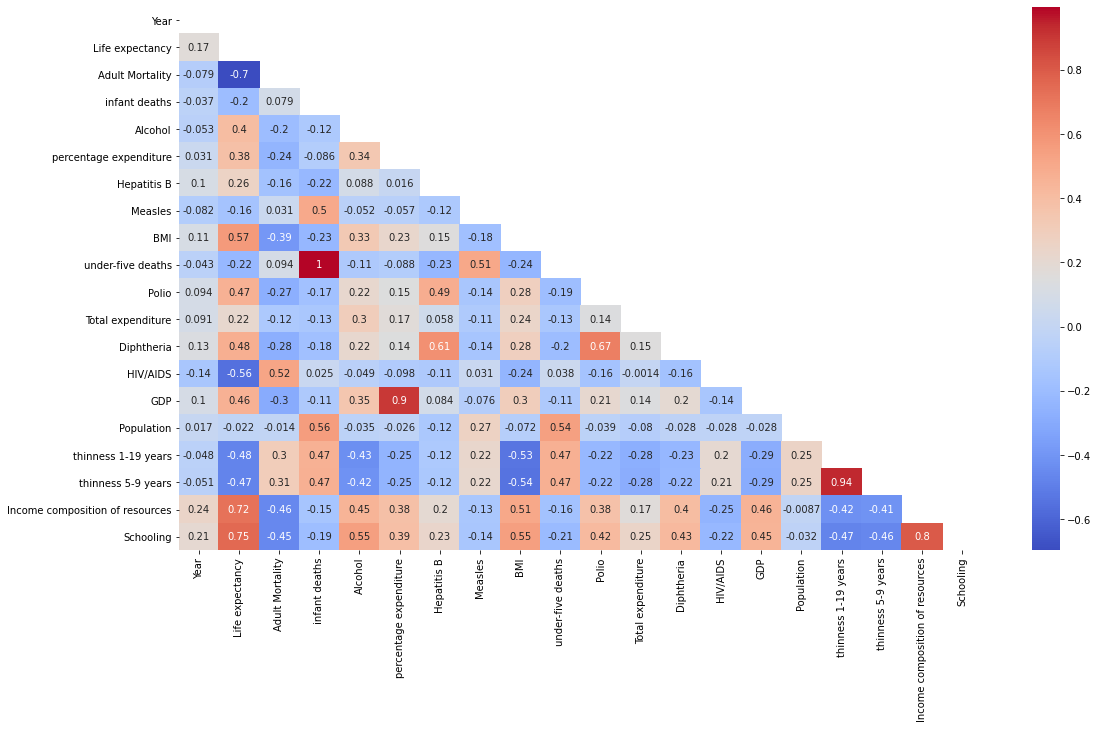

In [ ]:
mask = np.triu(np.ones_like(life_expectancy_df.corr()))
plt.subplots(figsize=(18,10))
dataplot = sns.heatmap(life_expectancy_df.corr(), cmap="coolwarm", annot=True, mask=mask)

**Nhận xét:**
Từ biểu đồ trên, ta có thể dự đoán rằng có nhiều thuộc tính "schooling", "income composition of resources", ... có ảnh hưởng mạnh tới tuổi thọ.

## Mức độ biến động tuổi thọ trung bình của toàn thế giới là như thế nào?

In [ ]:
mean_life_expectancy_sr = life_expectancy_df.groupby('Year')['Life expectancy'].mean()
mean_life_expectancy_sr

Year
2000    66.750273
2001    67.128962
2002    67.351366
2003    67.433333
2004    67.646448
2005    68.209290
2006    68.667760
2007    69.036066
2008    69.427869
2009    69.938251
2010    70.048634
2011    70.654098
2012    70.916940
2013    71.236066
2014    71.536612
2015    71.616940
Name: Life expectancy, dtype: float64

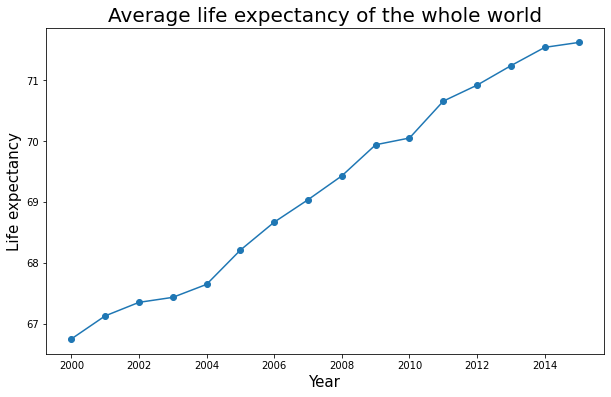

In [ ]:
mean_life_expectancy_sr.plot.line(marker='o',figsize=(10,6))
plt.xlabel('Year',size=15)
plt.ylabel('Life expectancy',size=15)
plt.title('Average life expectancy of the whole world',size=20)
plt.show()

**Nhận xét:** Tuổi thọ trung bình của toàn thế giới tăng qua từng năm và đạt giá trị cao nhất vào năm 2015 với tuổi thọ trung bình là 71.6 tuổi.

## Với mỗi quốc gia, Tuổi thọ trung bình các quốc gia là như thế nào?

In [ ]:
life_expectancy_country = life_expectancy_df.groupby('Country').agg({'Life expectancy':'mean'})
mean_expectancy_df = life_expectancy_country.rename(columns={'Life expectancy':'Mean life expectancy'})
mean_expectancy_df.sort_values(by=['Mean life expectancy'], ascending=False, inplace = True)

In [ ]:
country_status = life_expectancy_df[['Country','Status']]
country_status = country_status[~country_status.duplicated()]
country_expectancy_df = mean_expectancy_df.merge(country_status, left_on='Country', right_on='Country')
top_10_expectancy = country_expectancy_df[:10]
top_10_expectancy

,Country,Mean life expectancy,Status
0,Japan,82.53750,Developed
1,Sweden,82.51875,Developed
2,Iceland,82.44375,Developed
3,Switzerland,82.33125,Developed
4,France,82.21875,Developing
5,Italy,82.18750,Developed
6,Spain,82.06875,Developed
7,Australia,81.81250,Developed
8,Norway,81.79375,Developed
9,Canada,81.68750,Developing


In [ ]:
top_10_expectancy['Status'].value_counts(normalize = True) *100

Developed     80.0
Developing    20.0
Name: Status, dtype: float64

**Nhận xét:**
Nhận thấy trong top 10 các quốc gia tuổi thọ trung bình cao nhất thế giới thì hầu hết tập trung ở các nước phát triển (cụ thể 80%). Tuy nhiên, số liệu ở đây là tính trong khoảng thời gian từ năm 2000->2015 nên sự so sánh ở đây còn khá khập khiễng, chưa phản ánh đúng sự chú ý đến tuổi thọ của chính phủ các quốc gia trong những năm gần đây.

##Tốc độ tăng trưởng tuổi thọ của các quốc gia trên thế giới

- Để có cái nhìn chính xác hơn, ta chỉ lấy số liệu trong 3 năm gần đây nhất. Phần này, nhóm sẽ có cái nhìn tổng quát hơn về số liệu như đưa ra tốc độ tăng trưởng trung bình trong 3 năm và từ đó có thể dự đoán tuổi thọ trung bình các quốc gia đó trong các năm tiếp theo.

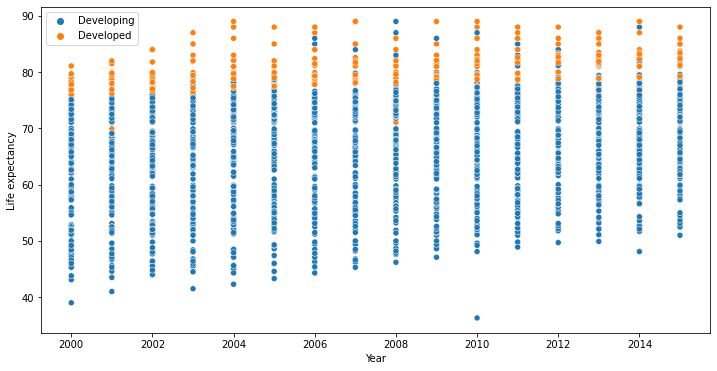

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=life_expectancy_df['Year'],y=life_expectancy_df['Life expectancy'],hue=life_expectancy_df['Status'])
plt.legend()
plt.show()

**Nhận xét:** Hầu hết các quốc gia có nền kinh tế đều có tuổi thọ trung bình cao hơn so với các nước có nền kinh tế đang phát triển.

In [ ]:
def life_expectancy_growth_rate(country,expectancy_df):
  sort_year_expectancy_df = expectancy_df[expectancy_df['Country'] == country].sort_values(by = 'Year')[-3:]
  expectancy_values = sort_year_expectancy_df['Life expectancy'].values
  mean_growth_rate_year = (np.diff(expectancy_values) / expectancy_values[:-1])*100
  return country, mean_growth_rate_year.mean()

In [ ]:
country_rate_growth = [life_expectancy_growth_rate(country,life_expectancy_df) for country in life_expectancy_df['Country'].unique()]
country_rate_growth = dict(country_rate_growth)
country_rate_growth_df = pd.Series(country_rate_growth).to_frame().reset_index()
country_rate_growth_df.columns=['Country','Rate growth life expectancy']

In [ ]:
max_year = life_expectancy_df[life_expectancy_df['Year'] == life_expectancy_df['Year'].max()]
country_rate_growth_df = country_rate_growth_df.merge(max_year[['Country','Year','Life expectancy','Status']],left_on='Country',right_on='Country')
country_rate_growth_df = country_rate_growth_df.sort_values(by='Life expectancy',ascending=False).reset_index(drop=True)
country_rate_growth_df.head(10)

,Country,Rate growth life expectancy,Year,Life expectancy,Status
0,Slovenia,1.751183,2015,88.0,Developed
1,Denmark,3.042328,2015,86.0,Developed
2,Cyprus,2.439387,2015,85.0,Developed
3,Chile,2.439387,2015,85.0,Developing
4,Japan,0.119760,2015,83.7,Developed
5,Switzerland,0.240674,2015,83.4,Developed
6,Singapore,0.241546,2015,83.1,Developed
7,Spain,0.242425,2015,82.8,Developed
8,Australia,0.181672,2015,82.8,Developed
9,Italy,0.242719,2015,82.7,Developed


### Với các quốc gia phát triển

In [ ]:
developed_country = country_rate_growth_df[country_rate_growth_df['Status'] == 'Developed']
developed_country.head()

,Country,Rate growth life expectancy,Year,Life expectancy,Status
0,Slovenia,1.751183,2015,88.0,Developed
1,Denmark,3.042328,2015,86.0,Developed
2,Cyprus,2.439387,2015,85.0,Developed
4,Japan,0.119760,2015,83.7,Developed
5,Switzerland,0.240674,2015,83.4,Developed


In [ ]:
developed_country[['Life expectancy','Rate growth life expectancy']].describe()

,Life expectancy,Rate growth life expectancy
count,32.000000,32.000000
mean,80.709375,0.056254
std,3.460501,1.353148
min,73.600000,-3.324819
25%,78.600000,0.184238
50%,81.550000,0.246496
75%,82.725000,0.344597
max,88.000000,3.042328


**Nhận xét:** Hầu hết các các quốc gia phát triển có tuổi thọ trung bình tương đối cao (khoảng 81 tuổi) và tốc độ tăng tuổi thọ mỗi năm ở mức độ vừa phải (khoảng 0.25%). Bởi vì tuổi thọ con người có mức hạn nhất định, nên khi đến độ tuổi trên 80, hiện tượng lão hóa ở người lớn bắt đầu có dấu hiệu thì tốc độ tăng tuổi thọ sẽ không còn được cao so với các độ tuổi thấp hơn.

In [ ]:
developed_country[developed_country['Rate growth life expectancy'] > 1]

,Country,Rate growth life expectancy,Year,Life expectancy,Status
0,Slovenia,1.751183,2015,88.0,Developed
1,Denmark,3.042328,2015,86.0,Developed
2,Cyprus,2.439387,2015,85.0,Developed


**Nhận xét:** Có 1 số nước tốc độ tăng tuổi thọ rất cao điển hình như Slovenia, Đan Mạch (các nước Bắc Âu) và điều đáng chú ý là tuổi thọ trung bình của các nước đó là 88 tuổi - sống rất thọ. Nguyên nhân cả hai quốc gia đều đặt chính sách chăm sóc sức khỏe của mình dựa trên mô hình nhà nước phúc lợi toàn dân, với khả năng tiếp cận chăm sóc sức khỏe miễn phí và bình đẳng.

Nguồn: https://www.ncbi.nlm.nih.gov/books/NBK62583/

In [ ]:
developed_country[developed_country['Rate growth life expectancy'] < -2]

,Country,Rate growth life expectancy,Year,Life expectancy,Status
23,United Kingdom of Great Britain and Northern I...,-3.324819,2015,81.2,Developed
24,Portugal,-2.694016,2015,81.1,Developed
26,Belgium,-3.288777,2015,81.1,Developed
27,Germany,-2.750196,2015,81.0,Developed


**Nhận xét:** Có 1 số nước bị giảm tuổi thọ tương đối lớn như Bồ Đào Nha, Bỉ, Đức, Anh (tập trung ở Đông Âu). Nguyên nhân trong khoảng thời gian 2012-2015, các nước này bị một số nguồn lây nhiễm Non-Communicable Diseases, nên tỉ lệ tử vong ngày càng nhiều và dẫn đến tuổi thọ trung bình bị giảm xuống.

### Với các quốc gia đang phát triển phát triển

In [ ]:
developing_country = country_rate_growth_df[country_rate_growth_df['Status'] == 'Developing']
developing_country.head()

,Country,Rate growth life expectancy,Year,Life expectancy,Status
3,Chile,2.439387,2015,85.0,Developing
11,Israel,0.243383,2015,82.5,Developing
12,France,0.243606,2015,82.4,Developing
14,Republic of Korea,0.366525,2015,82.3,Developing
15,Canada,0.244201,2015,82.2,Developing


In [ ]:
developing_country[['Life expectancy','Rate growth life expectancy']].describe()

,Life expectancy,Rate growth life expectancy
count,151.000000,151.000000
mean,69.690066,0.385948
std,7.498282,1.340330
min,51.000000,-5.181513
25%,64.600000,0.199159
50%,71.600000,0.302573
75%,75.500000,0.635321
max,85.000000,7.622321


**Nhận xét:** 
- Các các quốc gia đang phát triển có tuổi thọ trung bình ở mức độ trung bình (khoảng 71 tuổi) và tốc độ tăng tuổi thọ mỗi năm ở mức độ vừa phải (khoảng 0.3%).
- Tuổi thọ trung bình có 1 số nước chỉ có 51 tuổi - tuổi thọ rất đáng báo động. 

==> Chắc chắn có nhiều nguyên nhân tuổi thọ trung bình không được cao như các nước phát triển bao gồm điều kiện ăn uống, chế độ sinh hoạt, nghỉ ngơi chưa được khoa học và hợp lý

In [ ]:
developing_country[developing_country['Rate growth life expectancy'] > 3]

,Country,Rate growth life expectancy,Year,Life expectancy,Status
44,Bolivia (Plurinational State of),4.139703,2015,77.0,Developing
57,Democratic People's Republic of Korea,3.463245,2015,76.0,Developing
71,Russian Federation,3.512720,2015,75.0,Developing
127,Zimbabwe,7.622321,2015,67.0,Developing
141,Afghanistan,4.257095,2015,65.0,Developing
180,Central African Republic,3.374853,2015,52.5,Developing


**Nhận xét:** Có 1 số quốc gia bắt đầu chú trọng hơn đối với việc chăm sóc sức khỏe như Bolivia, Triều Tiên, Nga, ... Thậm chí, còn có 1 số nước tốc độ tăng tuổi thọ lớn hơn 4% mỗi năm. Đó là 1 điều cực kì tốt và cần phải phát huy hơn nữa. 

In [ ]:
developing_country[developing_country['Rate growth life expectancy'] < -2]

,Country,Rate growth life expectancy,Year,Life expectancy,Status
25,Finland,-3.288777,2015,81.1,Developing
28,Greece,-2.814482,2015,81.0,Developing
110,Kyrgyzstan,-3.773726,2015,71.1,Developing
153,South Africa,-4.346657,2015,62.9,Developing
155,Uganda,-3.454071,2015,62.3,Developing
157,Niger,-5.181513,2015,61.8,Developing
160,Gambia,-3.558378,2015,61.1,Developing
182,Sierra Leone,-2.448410,2015,51.0,Developing


**Nhận xét:** Ngược lại, 1 số quốc gia đang có mức độ giảm tuổi thọ đáng báo động như Niger, Gambia, Nam Phi, (đa số tập trung hầu hết ở các nước Nam Phi). Một trong những vấn đề sức khỏe lớn nhất mà châu Phi phải đối mặt là đại dịch HIV / AIDS. HIV / AIDS đã cướp đi sinh mạng của nhiều người ở châu Phi, đó là lý do chính khiến tuổi thọ trung bình thấp đến vậy. Việc chữa trị những căn bệnh này rất khó khăn vào thời kỳ cao điểm của dịch bệnh, rất nhiều người châu Phi đã không may qua đời.

Nguồn: https://borgenproject.org/life-expectancy-in-africa-improves/

### Tìm hiểu đất nước thân yêu của chúng ta "Việt Nam"

In [ ]:
developing_country[developing_country['Country'] == 'Viet Nam']

,Country,Rate growth life expectancy,Year,Life expectancy,Status
58,Viet Nam,0.197977,2015,76.0,Developing


**Nhận xét:** Đất nước chúng ta có tuổi thọ trung bình cao trong các đất nước đang phát triển và cao hơn so với tuổi thọ trung bình của toàn thế thế. Ngoài ra, tốc độ tăng trưởng mỗi năm khá tương đồng so với các quốc gia phát triển. Điều đó cho thấy nhà nước đã có những chính sách, giải pháp quan tâm đến sức khỏe của người dân.

`Thật tuyệt vời :)`

### Dự báo tuổi thọ trung bình của các nước trong năm tiếp theo

In [ ]:
forecast_life_expectancy = country_rate_growth_df.copy()
a = forecast_life_expectancy['Rate growth life expectancy'] * forecast_life_expectancy['Life expectancy'] / 100
forecast_life_expectancy['Forecaste life expectancy 2016'] = a + forecast_life_expectancy['Life expectancy']

In [ ]:
forecast_life_expectancy

,Country,Rate growth life expectancy,Year,Life expectancy,Status,Forecaste life expectancy 2016
0,Slovenia,1.751183,2015,88.0,Developed,89.541041
1,Denmark,3.042328,2015,86.0,Developed,88.616402
2,Cyprus,2.439387,2015,85.0,Developed,87.073479
3,Chile,2.439387,2015,85.0,Developing,87.073479
4,Japan,0.119760,2015,83.7,Developed,83.800240
...,...,...,...,...,...,...
178,Côte d'Ivoire,0.951496,2015,53.3,Developing,53.807148
179,Chad,0.858427,2015,53.1,Developing,53.555825
180,Central African Republic,3.374853,2015,52.5,Developing,54.271798
181,Angola,1.264067,2015,52.4,Developing,53.062371


## Insight tiếp

In [ ]:
a = life_expectancy_df.groupby('Country').agg({'Alcohol':'mean','Life expectancy':'mean'})

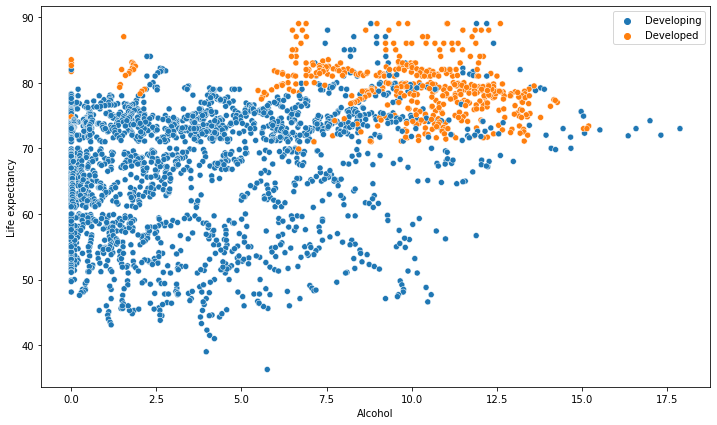

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=life_expectancy_df['Alcohol'],y=life_expectancy_df['Life expectancy'],hue=life_expectancy_df['Status'])
plt.legend()
plt.show()

In [ ]:
a.loc['Japan',:]

Alcohol             7.040667
Life expectancy    82.537500
Name: Japan, dtype: float64